In [2]:
from google.colab import files


uploaded = files.upload()


Saving sample.csv to sample.csv


In [353]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['sample.csv']))
df['PRICE PAID'] = df['PRICE PAID'].str.replace(',', '').astype(int)
df['PRICE PAID'] = df['PRICE PAID']//(100000)
df.rename(columns={'PRICE PAID':'PRICE PAID(in lakhs)'},inplace=True)
df.head()


,count
TEAM,
KKR,10
DC,9
GT,8
MI,8
PBKS,8
CSK,6
LSG,6
RCB,6
SRH,6


1st graph - No. of Indian vs No. of Overseas players of each team

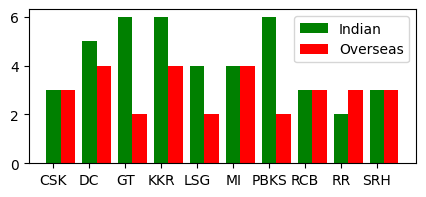

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

width = 0.4
teams = ['CSK','DC','GT','KKR','LSG','MI','PBKS','RCB','RR','SRH']
count = df.groupby(['TEAM', 'NATIONALITY']).size().unstack(fill_value=0)
count.columns = ['Indians', 'Overseas']
plt.figure(figsize=(5,2))

num = np.arange(len(teams))
plt.xticks(num,teams)
plt.bar(num,count['Indians'],width = width, color = 'green',label = 'Indian')
plt.bar(num+width,count['Overseas'],width = width,color ='red',label = 'Overseas')
plt.legend()

2nd graph - Histogram of price ranges vs. no. of players

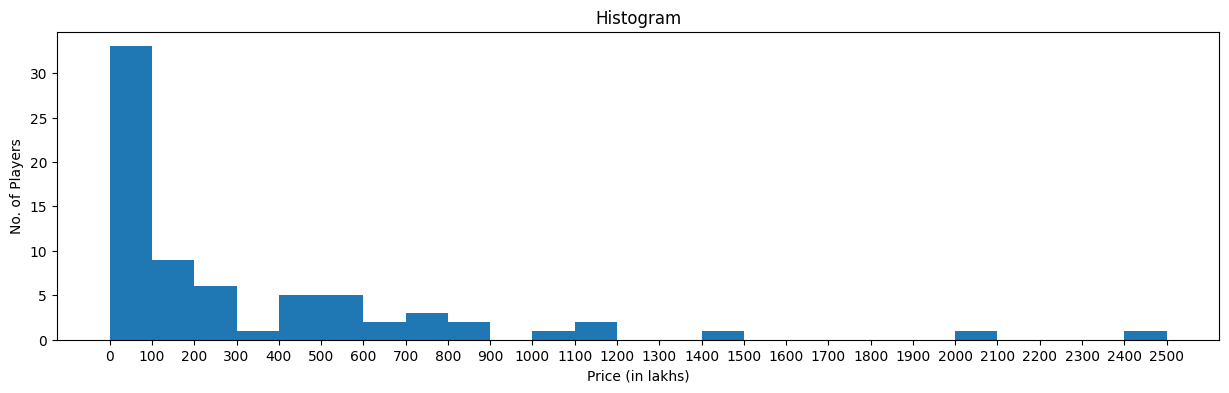

In [228]:

#import FuncFormatter from matplotlib.ticker

plt.figure(figsize=(15,4))
plt.hist(df['PRICE PAID(in lakhs)'],bins = np.arange(0,2600,100))
plt.xticks(np.arange(0,2600,100))
plt.xlabel('Price (in lakhs)')
plt.ylabel('No. of Players')
plt.title('Histogram')

plt.show()


3rd - Piechart of different types of players

<ipython-input-308-7d83cc496709>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


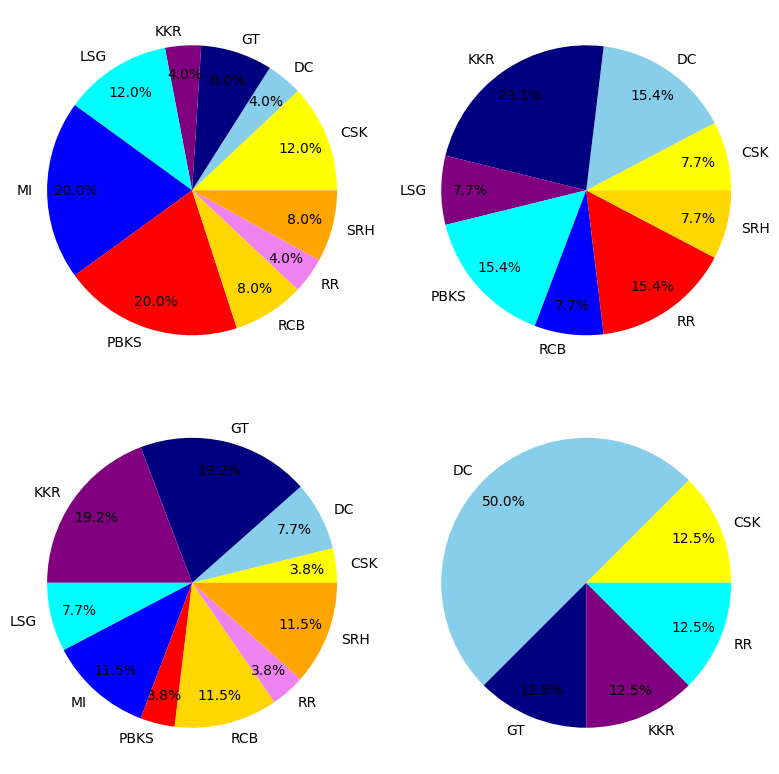

In [308]:
types=df.groupby(['TEAM','TYPE']).size().unstack(fill_value=0)
types.columns=['ALL-ROUNDER','BATTER','BOWLER','WICKET-KEEPER']
types = types.groupby(['TEAM']).mean().reset_index()
types = types.applymap(lambda y :int(y) if type(y)==float else y)

plt.figure(figsize=(8,8))
colors = ['yellow','#87CEEB','#000080', 'purple','cyan','blue','red','#FFD700','violet','orange']
plt.title(f'TYPES distribution across teams')

#1st pie
plt.subplot(2,2,1)
type1 = types.loc[lambda types:types['ALL-ROUNDER'] != 0]
plt.pie(type1['ALL-ROUNDER'], labels=teams, autopct='%0.1f%%', colors =colors, pctdistance=0.8)

#2nd pie
plt.subplot(2,2,2)
type2 = types.loc[lambda types:types['BATTER'] != 0]
plt.pie(type2['BATTER'], labels=type2['TEAM'], autopct='%0.1f%%', colors =colors, pctdistance=0.8)

#3rd pie
plt.subplot(2,2,3)
type3 = types.loc[lambda types:types['BOWLER'] != 0]
plt.pie(type3['BOWLER'], labels=type3['TEAM'], autopct='%0.1f%%', colors =colors, pctdistance=0.8)

#4th pie
plt.subplot(2,2,4)
type4 = types.loc[lambda types:types['WICKET-KEEPER'] != 0]
plt.pie(type4['WICKET-KEEPER'], labels=type4['TEAM'], autopct='%0.1f%%', colors =colors, pctdistance=0.8)

plt.tight_layout()
plt.show()

4th - Top 10 players

             PLAYER NATIONALITY          TYPE  PRICE PAID(in lakhs)  TEAM
0  Mitchell  Starc    Overseas        Bowler                   2475   KKR
1      Pat Cummins    Overseas   All-Rounder                   2050   SRH
2   Daryl Mitchell    Overseas   All-Rounder                   1400   CSK
3    Harshal Patel      Indian   All-Rounder                   1175  PBKS
4   Alzarri Joseph    Overseas        Bowler                   1150   RCB
5  Spencer Johnson    Overseas        Bowler                   1000    GT
6     Sameer Rizvi      Indian        Batter                    840   CSK
7    Rilee Rossouw    Overseas        Batter                    800  PBKS
8    Rovman Powell    Overseas        Batter                    740    RR
9    Shahrukh Khan      Indian   All-Rounder                    740    GT


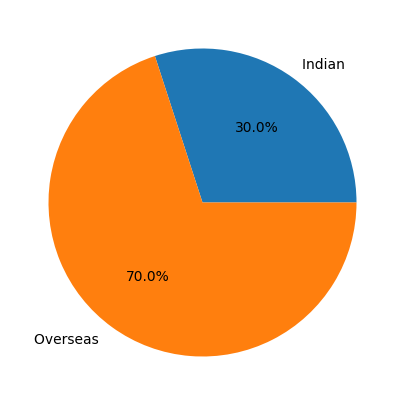

In [366]:
amount = df.sort_values(by='PRICE PAID(in lakhs)', ascending = False).head(10)
amount = amount.reset_index(drop=True)
print(amount)

top = pd.DataFrame(amount['NATIONALITY'].value_counts())
top = count.groupby(['NATIONALITY']).mean().reset_index()
top = count.applymap(lambda y :int(y) if type(y)==float else y)

plt.figure(figsize=(5,5))
plt.pie(top['count'],labels =top['NATIONALITY'],autopct = '%1.1f%%')
plt.show(block = False)
